In [9]:
# data processing
import pandas as pd 

# data visualization
import seaborn as sns
#matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

#Statistics package
from scipy import stats

#Linear regression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Categorises according to the statistical significance
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "ns"

In [10]:
df = pd.read_csv('Results_for_expD.csv')

df.head()


,Fish,Date,Age (dpf),Repeat number,Repeat_no,Induction_time,Lose_TR_time,RR_bpm,Age,SL,TT_movement,TT_Recovery,Recovery
0,1,15/07/2020,21,1.0,1,00:09,00:36,0,23,6.0,05:41,05:50,Y
1,2,15/07/2020,21,1.0,1,00:32,00:39,0,23,9.0,03:24,05:46,Y
2,3,15/07/2020,21,1.0,1,00:21,00:47,0,23,7.5,02:13,03:07,Y
3,4,15/07/2020,21,1.0,1,01:00,01:21,0,23,7.0,03:34,03:51,Y
4,5,15/07/2020,21,1.0,1,00:13,00:38,0,23,7.0,03:29,04:27,Y


In [11]:
#Inspect the first 5 rows 

from datetime import datetime

sequence = ['Induction_time','Lose_TR_time','TT_movement','TT_Recovery']

#Convert to seconds
for i in sequence:
    df[i+'_sec']=df[i].str[-5:-3].astype(float)*60+df[i].str[-2:].astype(float)

df['Repeat_no'] = df['Repeat_no'].astype('int64')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
Fish                  90 non-null int64
Date                  30 non-null object
Age (dpf)             30 non-null object
Repeat number         30 non-null float64
Repeat_no             90 non-null int64
Induction_time        90 non-null object
Lose_TR_time          90 non-null object
RR_bpm                90 non-null int64
Age                   90 non-null int64
SL                    90 non-null float64
TT_movement           90 non-null object
TT_Recovery           90 non-null object
Recovery              90 non-null object
Induction_time_sec    90 non-null float64
Lose_TR_time_sec      90 non-null float64
TT_movement_sec       90 non-null float64
TT_Recovery_sec       90 non-null float64
dtypes: float64(6), int64(4), object(7)
memory usage: 12.1+ KB


,Fish,Date,Age (dpf),Repeat number,Repeat_no,Induction_time,Lose_TR_time,RR_bpm,Age,SL,TT_movement,TT_Recovery,Recovery,Induction_time_sec,Lose_TR_time_sec,TT_movement_sec,TT_Recovery_sec
0,1,15/07/2020,21,1.0,1,00:09,00:36,0,23,6.0,05:41,05:50,Y,9.0,36.0,341.0,350.0
1,2,15/07/2020,21,1.0,1,00:32,00:39,0,23,9.0,03:24,05:46,Y,32.0,39.0,204.0,346.0
2,3,15/07/2020,21,1.0,1,00:21,00:47,0,23,7.5,02:13,03:07,Y,21.0,47.0,133.0,187.0
3,4,15/07/2020,21,1.0,1,01:00,01:21,0,23,7.0,03:34,03:51,Y,60.0,81.0,214.0,231.0
4,5,15/07/2020,21,1.0,1,00:13,00:38,0,23,7.0,03:29,04:27,Y,13.0,38.0,209.0,267.0


In [22]:
import seaborn as sns, matplotlib.pyplot as plt
import scipy
from scipy.stats import mannwhitneyu

#Generates all my plots and statistical studies.
for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)')]:
    print("\033[1m"+k+"\033[0m")
    for rep_no in np.arange(1,10):
        rep_df=My_df.query('Repeat_no == @rep_no')
        
        z,pval = stats.shapiro(rep_df[i])
        alpha = 0.05
        print('*****')
        print('Repeat number:') 
        print(rep_no)
        
        print("pval = {:g}".format(pval))
        if pval < alpha:  # null hypothesis: x comes from a normal distribution
            print('Not normal distribution')
        else:
            print('Likely normal distribution')

Induction time (mm:ss)
*****
Repeat number:
1
pval = 0.73427
Likely normal distribution
*****
Repeat number:
2
pval = 0.0903332
Likely normal distribution
*****
Repeat number:
3
pval = 0.0527681
Likely normal distribution
*****
Repeat number:
4
pval = 0.19684
Likely normal distribution
*****
Repeat number:
5
pval = 0.842826
Likely normal distribution
*****
Repeat number:
6
pval = 0.391386
Likely normal distribution
*****
Repeat number:
7
pval = 0.453655
Likely normal distribution
*****
Repeat number:
8
pval = 0.0674493
Likely normal distribution
*****
Repeat number:
9
pval = 0.33142
Likely normal distribution
Time taken to lose touch responsiveness (mm:ss)
*****
Repeat number:
1
pval = 0.192008
Likely normal distribution
*****
Repeat number:
2
pval = 0.63724
Likely normal distribution
*****
Repeat number:
3
pval = 0.0632577
Likely normal distribution
*****
Repeat number:
4
pval = 0.173942
Likely normal distribution
*****
Repeat number:
5
pval = 0.803361
Likely normal distribution
*****

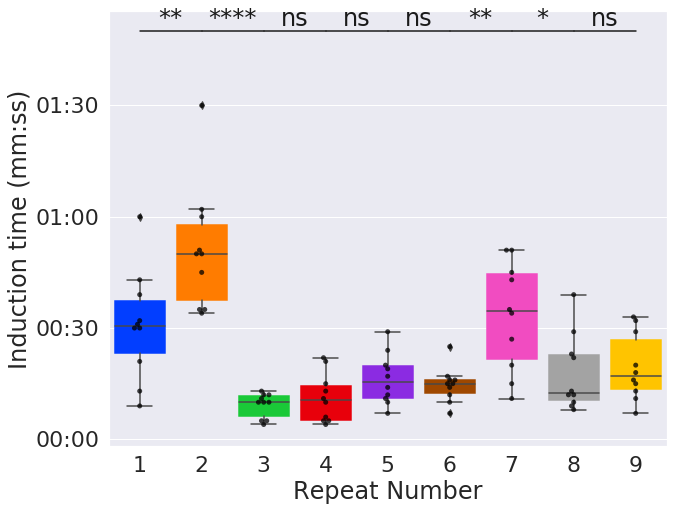

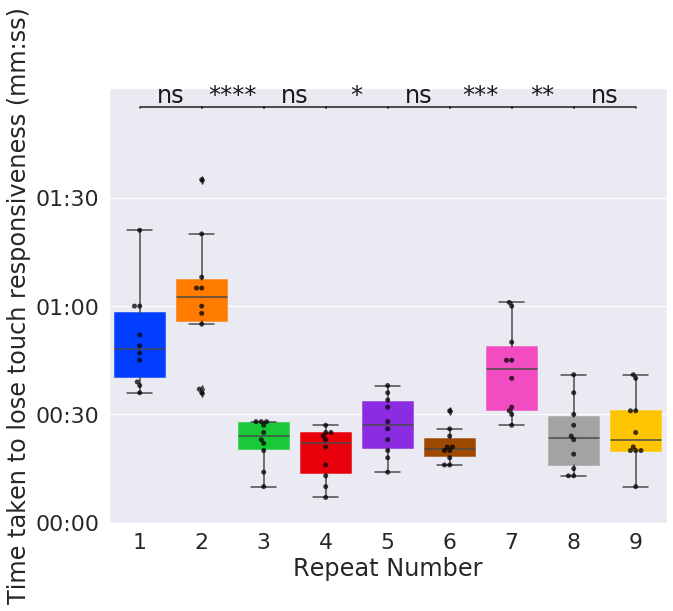

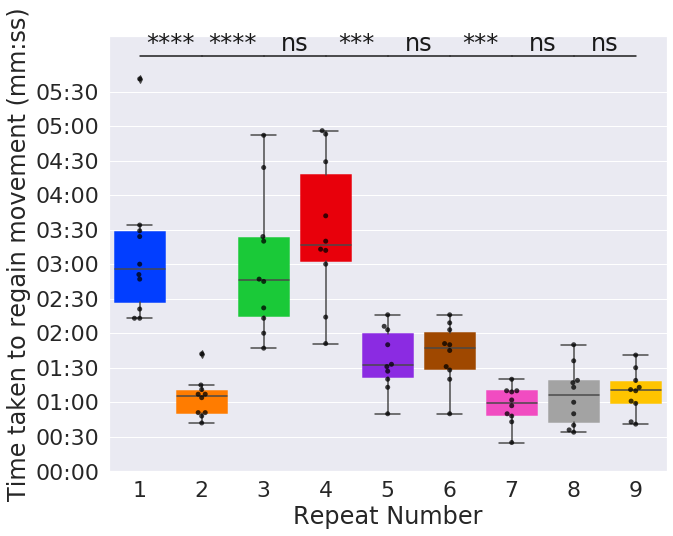

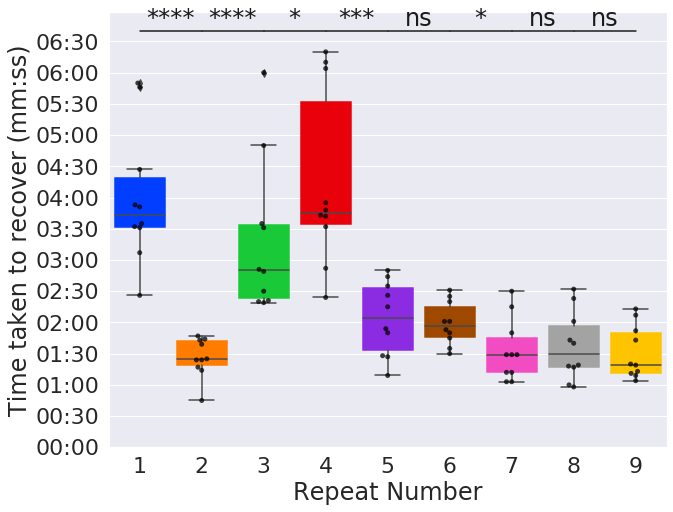

In [7]:
import seaborn as sns, matplotlib.pyplot as plt
import scipy
from scipy.stats import mannwhitneyu

#Generates all my plots and statistical studies.
for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)')]:
    fig, axes = plt.subplots(figsize=(10,8))
    sns.set(font_scale=2)  
    My_df=df
        
            ##Protocol number vs ....
        
            ##STATISTICAL SIGNIFICANCE SECTION
            #See if there is a significant difference between any repeat numbers 
    save_rep=[]
    t_mat=np.zeros((10,10))
    p_mat=np.zeros((10,10))
            
    for rep_no in np.arange(1,10):
        rep_df=My_df.query('Repeat_no == @rep_no')
        #save_rep contains the list of values in column 'i' for each repeat number.
        save_rep.append(rep_df[i])
            
    for rep_i in np.arange(0,9):
        for rep_j in np.arange(0,9):
                    #All combinations of significance saved into an array!
            t_ij,p_ij=scipy.stats.mannwhitneyu(save_rep[rep_i],save_rep[rep_j])
            t_mat[rep_i,rep_j]=t_ij
            p_mat[rep_i,rep_j]=p_ij
            
            #PLOT FIGURE

    tips = My_df.dropna(how='all')
    ax=sns.boxplot(x="Repeat_no", y=i, data=tips)
            # add swarmplot
    ax=sns.swarmplot(x="Repeat_no", y=i, data=tips, color='black', alpha=0.75)
    
     #CHANGE AESTHETICS
            #Changes the colours used in the boxplot
    colors = sns.color_palette('bright',n_colors=10)
    for artist,color in zip(ax.artists,colors):
        artist.set_facecolor(color)
        artist.set_edgecolor(color)
        
#Define y limit and increments.
    data_max=np.int(np.round(max(My_df[i]))/60)
    if data_max>=1:
                  #in minutes
        inc=1
                    #Extra space for *
        y_lim_max=data_max+inc
        y_actual_max=y_lim_max*60
    else:
        data_max=max(My_df[i])/60
        inc=0.1
        y_lim_max=data_max+inc
        y_actual_max=y_lim_max*60 
                 
    inc_star=inc

    #PLOT STATISTICAL SIGNIFICANCE
    #Add statistical significance to the plot
    
    #Only test significance between subsequent repeat numbers
    for l in range(8):
            #statistical annotation (plot * or  ns if not significant)
        x1 = l
        x2 = l+1   # columns 
         #This is in seconds.
        inc=max(My_df[i])/600
        y, h, col = My_df[i].max()+20, inc_star/60, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, stars(p_mat[l,l+1]), ha='center', va='bottom', color=col)
        #Only test significance between 1 repeat and repeats>1
 
 
    
    #Change the plot axis to time
    list=[]  
    
    if data_max>=1:
        ax.set(xlabel='Repeat Number', ylabel=k)
            #For small values add :30 increments.
        for time in np.arange(y_lim_max, step=1):
            list.append('0'+str(time)+':00')
            list.append('0'+str(time)+':30')
        plt.yticks(np.arange(y_actual_max, step=30), list)
    else: # Less than 1 minute
        ax.set(xlabel='Repeat Number', ylabel=k)
        for time in np.arange(y_lim_max*60, step=10):
            if time>0:
                list.append('00:'+str(np.int(time)))   
            else:
                list.append('00:00') 
            plt.yticks(np.arange(y_actual_max, step=10), list)
            
    plt.savefig(i+'.png', bbox_inches='tight')
    #plt.savefig('Age_size.eps', bbox_inches='tight')


In [23]:
import seaborn as sns, matplotlib.pyplot as plt
import scipy
from scipy.stats import mannwhitneyu

#Generates all my plots and statistical studies.
for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)')]:
    print("\033[1m"+k+"\033[0m")
    for rep_no in np.arange(1,10):
        rep_df=My_df.query('Fish == @rep_no')
        
        z,pval = stats.shapiro(rep_df[i])
        alpha = 0.05
        print('*****')
        print('Repeat number:') 
        print(rep_no)
        
        print("pval = {:g}".format(pval))
        if pval < alpha:  # null hypothesis: x comes from a normal distribution
            print('Not normal distribution')
        else:
            print('Likely normal distribution')

Induction time (mm:ss)
*****
Repeat number:
1
pval = 1.54253e-06
Not normal distribution
*****
Repeat number:
2
pval = 0.322905
Likely normal distribution
*****
Repeat number:
3
pval = 0.221434
Likely normal distribution
*****
Repeat number:
4
pval = 0.808652
Likely normal distribution
*****
Repeat number:
5
pval = 0.000464268
Not normal distribution
*****
Repeat number:
6
pval = 0.814503
Likely normal distribution
*****
Repeat number:
7
pval = 0.722995
Likely normal distribution
*****
Repeat number:
8
pval = 0.0529917
Likely normal distribution
*****
Repeat number:
9
pval = 0.44601
Likely normal distribution
Time taken to lose touch responsiveness (mm:ss)
*****
Repeat number:
1
pval = 0.0111275
Not normal distribution
*****
Repeat number:
2
pval = 0.319757
Likely normal distribution
*****
Repeat number:
3
pval = 0.28725
Likely normal distribution
*****
Repeat number:
4
pval = 0.00604006
Not normal distribution
*****
Repeat number:
5
pval = 0.123451
Likely normal distribution
*****
Rep

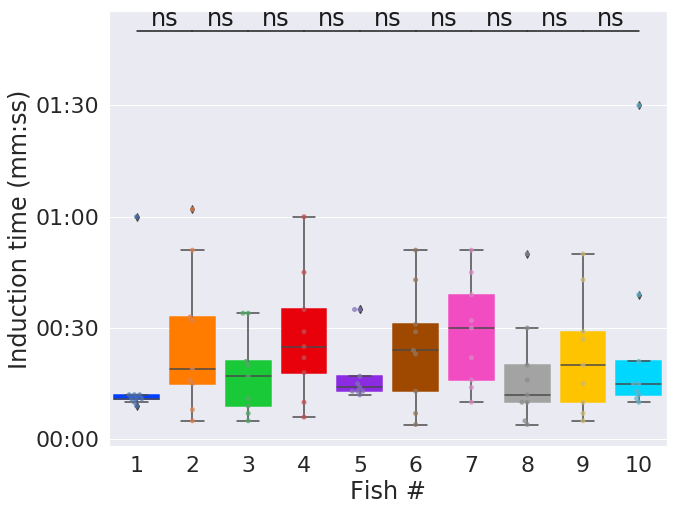

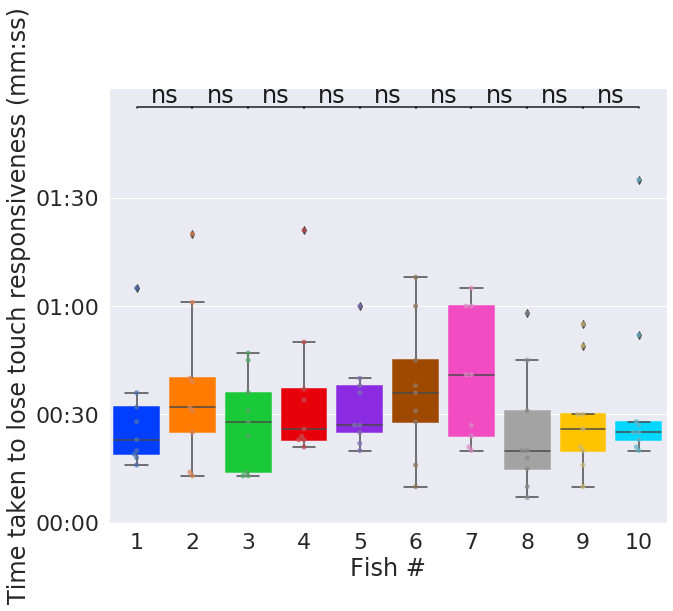

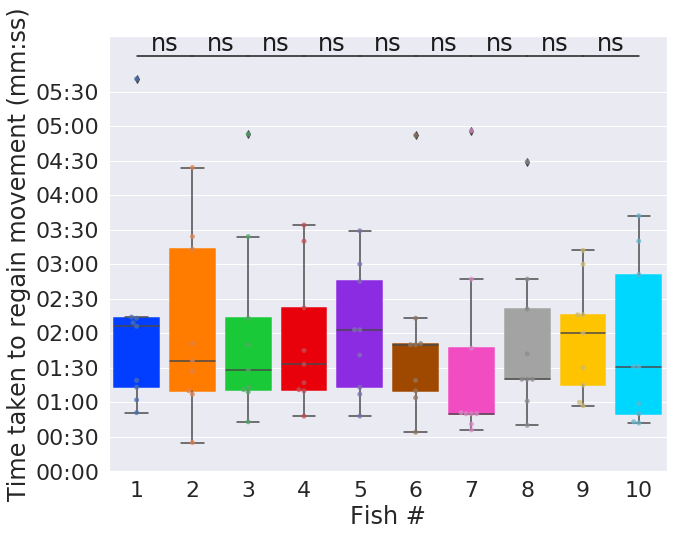

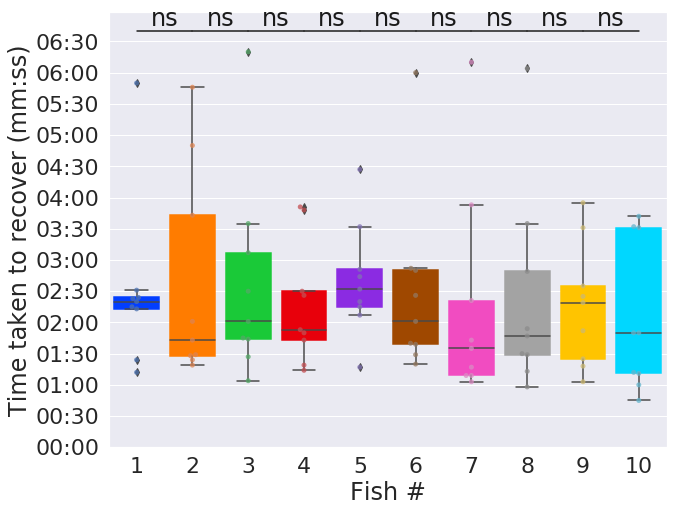

In [5]:
#Generates all my plots and statistical studies.
for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)')]:
        
    My_df=df
        
            ##Protocol number vs ....
        
            ##STATISTICAL SIGNIFICANCE SECTION
            #See if there is a significant difference between any repeat numbers 
    save_rep=[]
    t_mat=np.zeros((10,10))
    p_mat=np.zeros((10,10))
            
    for rep_no in np.arange(1,11):
        rep_df=My_df.query('Fish == @rep_no')
        #save_rep contains the list of values in column 'i' for each repeat number.
        save_rep.append(rep_df[i])
            
    for rep_i in np.arange(0,10):
        for rep_j in np.arange(0,10):
                    #All combinations of significance saved into an array!
            t_ij,p_ij=stats.ttest_ind(save_rep[rep_i],save_rep[rep_j], nan_policy='omit')
            t_mat[rep_i,rep_j]=t_ij
            p_mat[rep_i,rep_j]=p_ij
            
            #PLOT FIGURE
    fig, axes = plt.subplots(figsize=(10,8))
    sns.set(font_scale=2)
    tips = My_df.dropna(how='all')
    ax=sns.boxplot(x="Fish", y=i, data=tips)
            # add swarmplot
    ax=sns.swarmplot(x="Fish", y=i, data=tips, alpha=0.75)
    
    colors = sns.color_palette('bright',n_colors=10)
    for artist,color in zip(ax.artists,colors):
        artist.set_facecolor(color)
        artist.set_edgecolor(color)
        
        
    #Define y limit and increments.
    data_max=np.int(np.round(max(My_df[i]))/60)
    if data_max>=1:
                  #in minutes
        inc=1
                    #Extra space for *
        y_lim_max=data_max+inc
        y_actual_max=y_lim_max*60
    else:
        data_max=max(My_df[i])/60
        inc=0.1
        y_lim_max=data_max+inc
        y_actual_max=y_lim_max*60 
                 
        inc_star=inc

    #PLOT STATISTICAL SIGNIFICANCE
    #Add statistical significance to the plot
    
    #Only test significance between subsequent repeat numbers
    for l in range(9):
            #statistical annotation (plot * or  ns if not significant)
        x1 = l
        x2 = l+1   # columns 
         #This is in seconds.
        inc=max(My_df[i])/600
        y, h, col = My_df[i].max()+20, inc_star/60, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, stars(p_mat[l,l+1]), ha='center', va='bottom', color=col)
        #Only test significance between 1 repeat and repeats>1
 
 
    
    #Change the plot axis to time
    list=[]  
    
    if data_max>=1:
        ax.set(xlabel='Fish #', ylabel=k)
            #For small values add :30 increments.
        for time in np.arange(y_lim_max, step=1):
            list.append('0'+str(time)+':00')
            list.append('0'+str(time)+':30')
        plt.yticks(np.arange(y_actual_max, step=30), list)
    else: # Less than 1 minute
        ax.set(xlabel='Fish #', ylabel=k)
        for time in np.arange(y_lim_max*60, step=10):
            if time>0:
                list.append('00:'+str(np.int(time)))   
            else:
                list.append('00:00') 
            plt.yticks(np.arange(y_actual_max, step=10), list)
            
    plt.savefig('Fish'+i+'.png', bbox_inches='tight')


In [6]:
j=4
for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)'),('RR_beats','Beats per minute at 5:00'),('RR_breaths', 'Breaths per minute at 5:00')]:
    p_df=df
    #Multivariate linear regression with repeat number and size (SL) Fit an OLS model.        
    tips = p_df.dropna(how='all')
    tips.dropna(subset=[i], inplace=True)
    X = tips[['Repeat_no','SL']] 
    X_with_constant = sm.add_constant(X)
    Y = tips[i]
    model = sm.OLS(Y, X_with_constant).fit()
    predictions = model.predict(X_with_constant) 
        #Print results from the model
    print(k)
    print(model.summary())
        
        #X_2=tips['SL'] 
        #Y_2=tips[i]
        #X_with_constant = sm.add_constant(X_2)
        #model_2 = sm.OLS(Y_2, X_with_constant).fit()
        #predictions = model_2.predict(X_with_constant) 
        #Print results from the model
        #print(k+' Protocol '+j+' JUST SL')
        #print(model_2.summary())
        
        
        #X = tips['SL'].values.reshape(-1, 1)  # values converts it into a numpy array
        #Y = tips[i].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
        #linear_regressor = LinearRegression()  # create object for the class
        #linear_regressor.fit(X, Y)  # perform linear regression
        #Y_pred = linear_regressor.predict(X)  # make predictions
        #print(linear_regressor.summary)
        #line, = plt.plot(X, Y_pred, color=colour)
        #print(i)
        #print(linear_regressor.coef_)
        
        
    print('******************************************************************')

/home/jpo22/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Induction time (mm:ss)
                            OLS Regression Results                            
Dep. Variable:     Induction_time_sec   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     7.891
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           0.000709
Time:                        12:52:29   Log-Likelihood:                -370.92
No. Observations:                  90   AIC:                             747.8
Df Residuals:                      87   BIC:                             755.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4351      6.

KeyError: ['RR_beats']